In [1]:
%matplotlib inline

import csv
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

# Read data from URL

In [2]:
CSV_URL = 'https://gist.githubusercontent.com/prmishra/0e42b7444729751f354f668687ae0f4c/raw/072e4757d4041f789f00b0943b6ffed607342f16/data.csv'
with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    point_list = list(cr)
    
df = pd.DataFrame.from_records(point_list)
df = df.iloc[1:]
df.columns = ["V1", "V2"]  
df['V1'] = df['V1'].astype(str).astype(float)
df['V2'] = df['V2'].astype(str).astype(float)

# Plot data

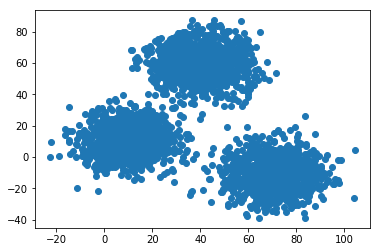

In [3]:
plt.scatter(df.V1, df.V2)
plt.show()

# Define k-means class

In [4]:
# Define k-means class
class kmeans:
    
    def __init__(self, k, data):
        self.k = k
        self.data = data
    
    # Distance function - Computes euclidean distnce between two points
    def compute_distance(self, v1, v2):
        dist = [(a - b)**2 for a, b in zip(v1, v2)]
        dist = math.sqrt(sum(dist))
        return dist

    # assign random centroids
    def random_centroids(self, k, data):
        centroids = []
        idx = np.random.choice(len(df)-1, k)
        for i in idx:
            centroids.append(df.iloc[i].values.tolist())
        centroidsdf = pd.DataFrame(centroids)
        return centroidsdf

    # Compute cluster error
    def compute_centroid_distance(self, centroid, data):
        dist = data.apply(self.compute_distance, axis=1, args=[centroid])
        return dist
    
    # assign membership of data poiint to the closest centroid
    def assign_memberships(self, centroids, data):
        err = centroids.apply(self.compute_centroid_distance, axis=1, args=[data])
        memberships = err.idxmin()
        mse = err.stack().mean()
        return memberships, mse

    # Compute mean of a cluster
    def compute_cluster_mean(self, member, arg):
        idx = np.array(arg[0].index[arg[1] == member.values[0]].tolist())
        cluster_mean = arg[0].iloc[idx-1].mean()
        return cluster_mean

    # Update the centroids based on memberships
    def update_centroids(self, data, memberships):
        arg  = [df, memberships]
        mem = pd.DataFrame(memberships.unique())
        centroids = mem.apply(self.compute_cluster_mean, axis=1, args=[arg])
        return centroids
    
    # Fit training data
    def fit(self):
        centroids = self.random_centroids(self.k, self.data)
        memberships, error = self.assign_memberships(centroids, self.data)
        while(True):
            old_error = error
            centroids = self.update_centroids(self.data, memberships)
            memberships, error = self.assign_memberships(centroids, self.data)
            if(old_error == error):
                return centroids, memberships
            
    # Plot cluster centroids on data     
    def centroid_plot(self, centroids):
        plt.scatter(self.data.V1, self.data.V2)
        plt.scatter(centroids.V1, centroids.V2, marker='o', color='black')
        plt.show()
        
    # Plot cluster memberships on data
    def membership_plot(self, centroids, memberships):
        mem = pd.DataFrame()
        colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink']
        if self.k > len(colors):
            k_colors = random.choices(colors, k=self.k)
        else:
            k_colors = random.sample(colors, k=self.k)
        colors_dict = dict(zip(np.array(range(0, self.k)).astype(str), k_colors))
        mem["memberships"] = memberships.astype(str)
        plt.scatter(self.data.V1, self.data.V2, c=mem['memberships'].apply(lambda x: colors_dict[x]))
        plt.scatter(centroids.V1, centroids.V2, marker='o', color='black')
        plt.show()

# Fit k-means

In [17]:
# fit training data
km = kmeans(k=5, data=df)
centroids, memberships = km.fit()

# Plot output

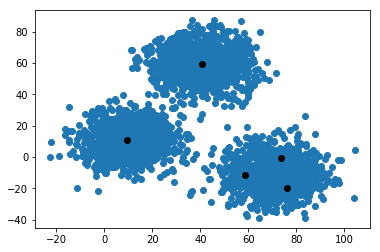

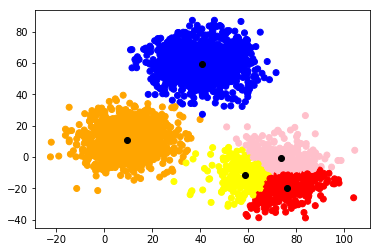

In [18]:
km.centroid_plot(centroids)
km.membership_plot(centroids, memberships)